In [ ]:
import pandas as pd

# Cargar el archivo JSON desde la ruta en Colab
df = pd.read_json("/content/TelecomX_Data.json")

# Vista rápida de las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Información general del DataFrame
df.info()

# Nombres de columnas
print(df.columns.tolist())

# Ver cuántos valores nulos hay
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


Consultar columnas de único valor

In [ ]:
import pandas as pd

# Función para verificar si una columna es "segura" para nunique
def is_hashable_column(series):
    return series.map(lambda x: isinstance(x, (str, int, float, bool, type(None)))).all()

# Aplicamos solo a columnas seguras
single_value_cols = [
    col for col in df.columns
    if is_hashable_column(df[col]) and df[col].nunique() == 1
]

print("Columnas con un único valor:", single_value_cols)


Columnas con un único valor: []


Eliminar columnas irrelevantes


In [ ]:
# Lista de columnas a eliminar
cols_to_drop = single_value_cols

# Eliminar columnas
df_clean = df.drop(columns=cols_to_drop)

# Verificar que se eliminaron
print("Columnas después de limpiar:", df_clean.columns.tolist())

Columnas después de limpiar: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


Guardar Dateset

In [ ]:
# Guardar nuevamente el DataFrame limpio en el archivo JSON
df_clean.to_json("/content/TelecomX_Data.json", orient="records", indent=4)
df_clean.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df_check = pd.read_json("/content/TelecomX_Data.json")
df_check.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Función para expandir las columnas de diccionario
def expand_dict_column(df, col_name):
    expanded_data = pd.json_normalize(df[col_name])
    expanded_data.columns = [f"{col_name}_{c}" for c in expanded_data.columns]
    return expanded_data

# Expandir las columnas de diccionario
customer_expanded = expand_dict_column(df_check, 'customer')
phone_expanded = expand_dict_column(df_check, 'phone')
internet_expanded = expand_dict_column(df_check, 'internet')
account_expanded = expand_dict_column(df_check, 'account')

# Concatenar las columnas expandidas con el DataFrame original (excluyendo las columnas de diccionario originales)
df_expanded = pd.concat([df_check.drop(columns=['customer', 'phone', 'internet', 'account']),
                         customer_expanded,
                         phone_expanded,
                         internet_expanded,
                         account_expanded], axis=1)

# 1️⃣ Detectar columnas categóricas (tipo object o category) en el DataFrame expandido
cat_cols_expanded = df_expanded.select_dtypes(include=["object", "category"]).columns.tolist()
print("Columnas categóricas después de expandir diccionarios:", cat_cols_expanded)

# 2️⃣ Aplicar One-Hot Encoding al DataFrame expandido
df_encoded = pd.get_dummies(df_expanded, columns=cat_cols_expanded, drop_first=True)

# 3️⃣ Guardar el dataset codificado
df_encoded.to_json("/content/TelecomX_Data_encoded.json", orient="records", indent=4)

# 4️⃣ Verificar
print("Dataset después del encoding:", df_encoded.shape)
display(df_encoded.head())

Columnas categóricas después de expandir diccionarios: ['customerID', 'Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Total']
Dataset después del encoding: (7267, 13827)


,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,account_Charges.Total_995.35,account_Charges.Total_996.45,account_Charges.Total_996.85,account_Charges.Total_996.95,account_Charges.Total_997.65,account_Charges.Total_997.75,account_Charges.Total_998.1,account_Charges.Total_999.45,account_Charges.Total_999.8,account_Charges.Total_999.9
0,0,9,65.6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd
df1 = pd.read_json("/content/TelecomX_Data_encoded.json")
df1.head()

# bloque de normalización + guardado

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el dataset codificado
df1 = pd.read_json("/content/TelecomX_Data_encoded.json")

# Función para detectar columnas continuas
def get_continuous_columns(df):
    continuous_cols = []
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            unique_vals = df[col].nunique()
            if unique_vals > 2:  # Más de dos valores → no es binaria
                continuous_cols.append(col)
    return continuous_cols

continuous_cols = get_continuous_columns(df1)
print("Columnas continuas detectadas:", continuous_cols)


Aplicar estandarización

In [ ]:
# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar solo las columnas continuas
df1[continuous_cols] = scaler.fit_transform(df1[continuous_cols])

# Verificar resultados
df1[continuous_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
customer_tenure,7267.0,-3.911065e-17,1.000069,-1.316499,-0.950200,-0.136202,0.921995,1.613894
account_Charges.Monthly,7267.0,7.333247e-17,1.000069,-1.542448,-0.972371,0.185210,0.834948,1.793375


Guardar el dataset escalado

In [ ]:
# Guardar dataset escalado
df1.to_json("/content/TelecomX_Data_scaled.json", orient="records", indent=4)

print("✅ Dataset escalado guardado en /content/TelecomX_Data_scaled.json")


✅ Dataset escalado guardado en /content/TelecomX_Data_scaled.json


## Verificación de la Proporción de Cancelación (Churn)

In [ ]:
import pandas as pd

# Cargar dataset escalado
df_scaled = pd.read_json("/content/TelecomX_Data_scaled.json")

# Calcular proporción de cancelaciones
churn_counts = df_scaled["Churn_Yes"].value_counts()
churn_percentage = df_scaled["Churn_Yes"].value_counts(normalize=True) * 100

print("Conteo de clases:")
print(churn_counts)
print("\nPorcentaje de clases:")
print(churn_percentage)


Conteo de clases:
Churn_Yes
False    5398
True     1869
Name: count, dtype: int64

Porcentaje de clases:
Churn_Yes
False    74.280996
True     25.719004
Name: proportion, dtype: float64


Interpretación de la proporción de Churn

Clientes que no cancelaron (False) → 74.28%

Clientes que cancelaron (True) → 25.72%

Análisis de Correlación

🔹 Variables más correlacionadas con Churn_Yes:
Churn_Yes                                 1.000000
internet_InternetService_Fiber optic      0.300949
account_PaymentMethod_Electronic check    0.294626
account_Charges.Monthly                   0.189866
account_PaperlessBilling_Yes              0.186666
customer_SeniorCitizen                    0.146733
internet_StreamingTV_Yes                  0.062430
internet_StreamingMovies_Yes              0.060586
account_Charges.Total_75.3                0.039883
account_Charges.Total_69.6                0.039883
account_Charges.Total_69.65               0.039883
phone_MultipleLines_Yes                   0.039343
account_Charges.Total_50.45               0.034537
account_Charges.Total_79.55               0.034537
account_Charges.Total_74.9                0.034537
Name: Churn_Yes, dtype: float64

🔹 Variables menos correlacionadas con Churn_Yes:
customer_Partner_Yes                            -0.148546
internet_TechSupport_Yes                        

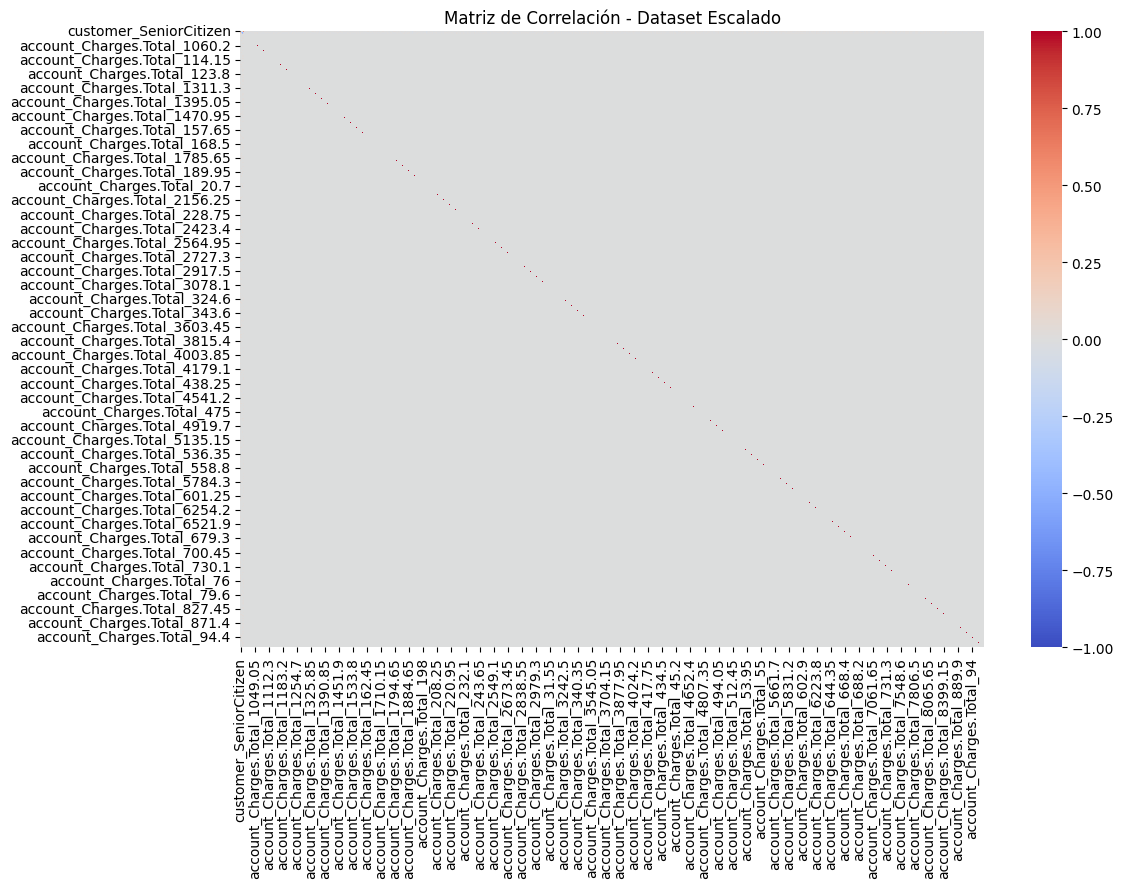

/tmp/ipython-input-3661373769.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="Reds_r")


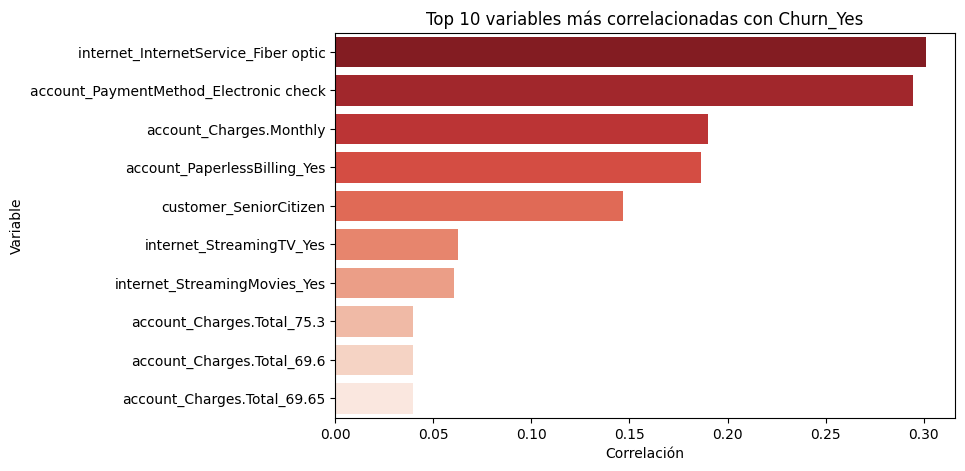

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Cargar el dataset escalado
df_scaled = pd.read_json("/content/TelecomX_Data_scaled.json")

# 2️⃣ Calcular la matriz de correlación
corr_matrix = df_scaled.corr(method="pearson")

# 3️⃣ Focalizar en la variable objetivo (Churn_Yes)
churn_corr = corr_matrix["Churn_Yes"].sort_values(ascending=False)

print("🔹 Variables más correlacionadas con Churn_Yes:")
print(churn_corr.head(15))  # top 15 correlaciones positivas
print("\n🔹 Variables menos correlacionadas con Churn_Yes:")
print(churn_corr.tail(15))  # top 15 correlaciones negativas

# 4️⃣ Visualizar la matriz de correlación completa (opcional, puede ser muy grande)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación - Dataset Escalado")
plt.show()

# 5️⃣ Visualizar solo la correlación con Churn_Yes como gráfico de barras
top_corr = churn_corr.drop("Churn_Yes").head(10)  # excluimos la propia target
plt.figure(figsize=(8,5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="Reds_r")
plt.title("Top 10 variables más correlacionadas con Churn_Yes")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()


Cargando: /content/TelecomX_Data_encoded.json
(7267, 6561)
Dimensiones:
X_train: (5813, 6560) X_test: (1454, 6560)
Distribución target (train):
Churn_Yes
0    0.7428
1    0.2572
Name: proportion, dtype: float64
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros KNN: {'clf__n_neighbors': 21, 'clf__p': 2, 'clf__weights': 'uniform'}

KNN – Métricas (test): {
  "accuracy": 0.7427785419532325,
  "roc_auc": 0.6714101802337097,
  "ap": 0.4436685825077836
}

KNN – Classification Report (test):
               precision    recall  f1-score   support

           0     0.7428    1.0000    0.8524      1080
           1     0.0000    0.0000    0.0000       374

    accuracy                         0.7428      1454
   macro avg     0.3714    0.5000    0.4262      1454
weighted avg     0.5517    0.7428    0.6331      1454



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


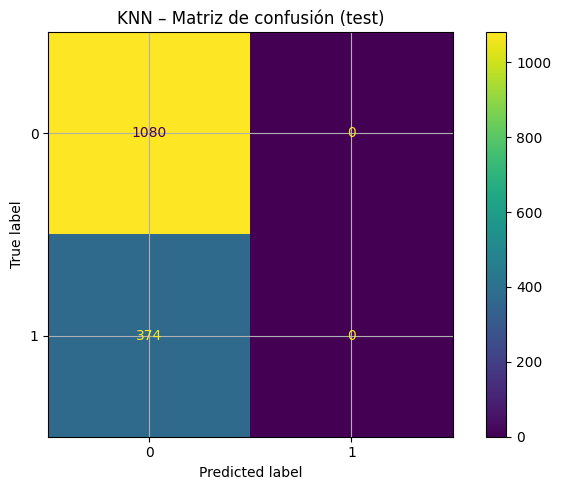

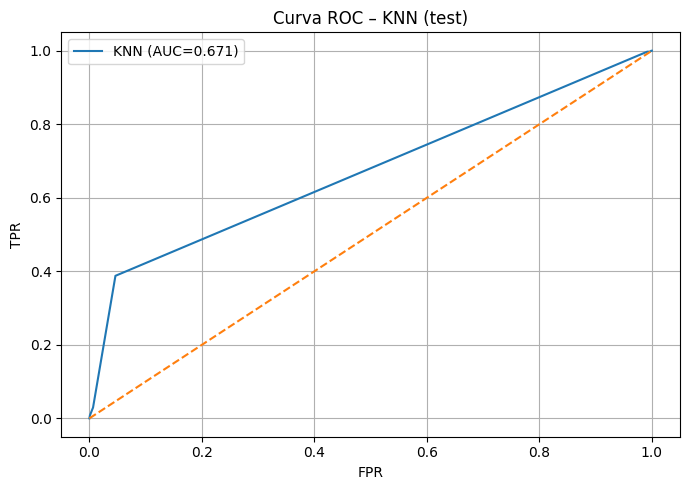

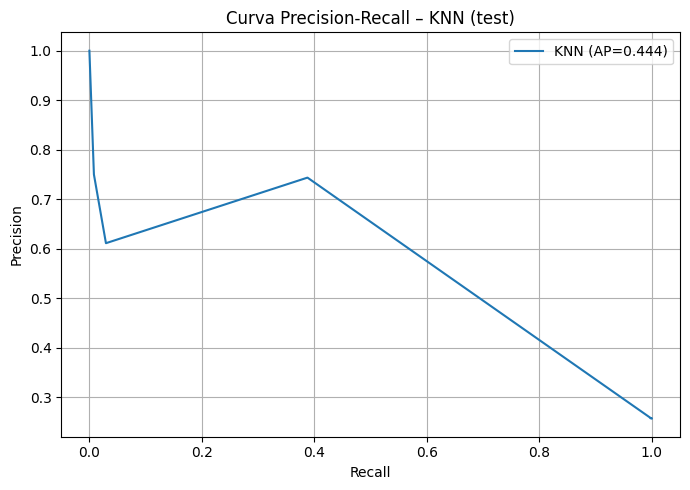


RandomForest – Métricas (test): {
  "accuracy": 0.953920220082531,
  "roc_auc": 0.983151366607249,
  "ap": 0.9024352726367434
}

RandomForest – Classification Report (test):
               precision    recall  f1-score   support

           0     0.9668    0.9713    0.9691      1080
           1     0.9160    0.9037    0.9098       374

    accuracy                         0.9539      1454
   macro avg     0.9414    0.9375    0.9394      1454
weighted avg     0.9537    0.9539    0.9538      1454



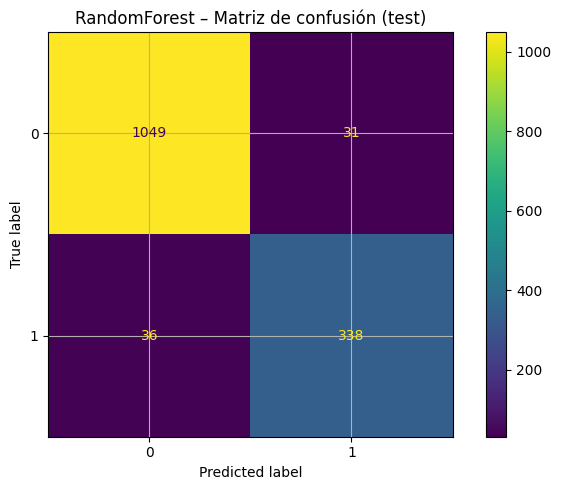

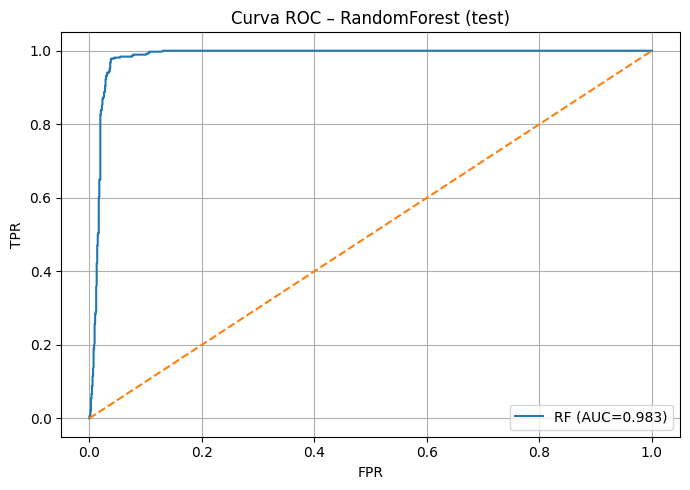

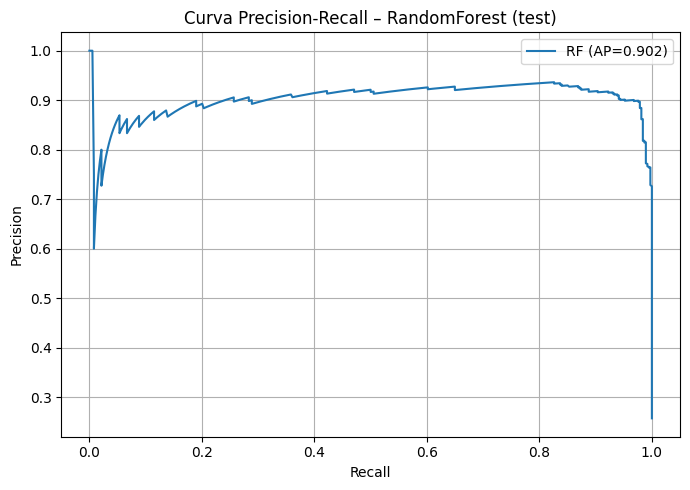

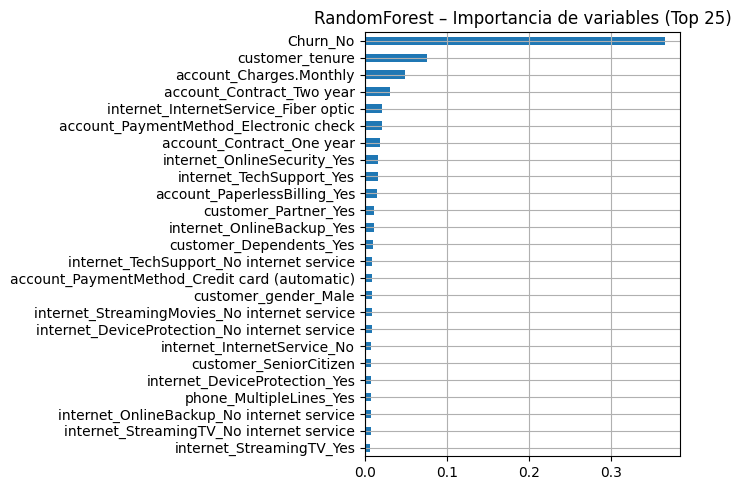



=== RESUMEN COMPARATIVO (TEST) ===
{
  "knn": {
    "accuracy": 0.7427785419532325,
    "roc_auc": 0.6714101802337097,
    "ap": 0.4436685825077836
  },
  "random_forest": {
    "accuracy": 0.953920220082531,
    "roc_auc": 0.983151366607249,
    "ap": 0.9024352726367434
  },
  "n_features_after_vt": 6560
}


In [ ]:
# =============================================================
# TELECOMX – MODELOS PREDICTIVOS DE CHURN
# Version: 1.0 (Colab-ready)
# Requisitos: pandas, numpy, scikit-learn, matplotlib, joblib, (opcional) imbalanced-learn
# Archivo de entrada esperado: /content/TelecomX_Data_encoded.json
# Salidas: métricas en /content/outputs, modelos en /content/models
# =============================================================

# -------------------------------
# 0) IMPORTS Y CONFIGURACIÓN
# -------------------------------
import os
import json
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             roc_auc_score, roc_curve, average_precision_score, precision_recall_curve)
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import Bunch
import matplotlib.pyplot as plt
from joblib import dump

# Opcional: descomenta si quieres usar SMOTE/RandomOverSampler
# from imblearn.over_sampling import RandomOverSampler, SMOTE

plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['axes.grid'] = True

OUTPUT_DIR = Path('/content/outputs')
MODEL_DIR = Path('/content/models')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
MODEL_DIR.mkdir(parents=True, exist_ok=True)

# -------------------------------
# 1) CARGA DE DATOS
# -------------------------------
DATA_PATH = '/content/TelecomX_Data_encoded.json'
print(f'Cargando: {DATA_PATH}')
df = pd.read_json(DATA_PATH)
print(df.shape)

# Convertir booleanos a 0/1 por seguridad (algunas columnas One-Hot quedan en bool)
bool_cols = df.select_dtypes(include=['bool']).columns
if len(bool_cols):
    df[bool_cols] = df[bool_cols].astype(int)

# Asegurar existencia del target
TARGET_COL = 'Churn_Yes'
if TARGET_COL not in df.columns:
    # Intentar derivarlo si existiese columna Churn original
    if 'Churn' in df.columns:
        df[TARGET_COL] = (df['Churn'].astype(str).str.strip().str.lower() == 'yes').astype(int)
    else:
        raise ValueError("No se encontró la columna 'Churn_Yes'. Verifica el dataset codificado.")

# Eliminar filas con target nulo/indefinido por si quedaron registros con Churn vacío
df = df[~df[TARGET_COL].isna()].copy()

# -------------------------------
# 2) TRAIN/TEST SPLIT E INFO BÁSICA
# -------------------------------
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL].astype(int)

# Eliminamos columnas de varianza cero (a veces aparecen tras One-Hot masivo)
vt = VarianceThreshold(threshold=0.0)
X_vt = vt.fit_transform(X)
cols_kept = X.columns[vt.get_support(indices=True)]
X = pd.DataFrame(X_vt, columns=cols_kept)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print('Dimensiones:')
print('X_train:', X_train.shape, 'X_test:', X_test.shape)
print('Distribución target (train):')
print(y_train.value_counts(normalize=True).round(4))

# -------------------------------
# 3) LISTAS DE VARIABLES NUMÉRICAS (TODO está numérico tras el encoding)
#    Aun así, escalaremos TODO para KNN y NO escalaremos para RandomForest
# -------------------------------
num_features = X_train.columns.tolist()

scaler = StandardScaler(with_mean=True, with_std=True)
scaler_ct = ColumnTransformer(
    transformers=[('num', scaler, num_features)], remainder='drop', sparse_threshold=0.0
)

# -------------------------------
# 4) MODELO 1 – KNN (REQUIERE NORMALIZACIÓN)
# -------------------------------
pipe_knn = Pipeline(steps=[
    ('scale', scaler_ct),
    ('clf', KNeighborsClassifier())
])

param_grid_knn = {
    'clf__n_neighbors': [5, 11, 21],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2]  # Manhattan vs Euclidiana
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

gs_knn.fit(X_train, y_train)
print('Mejores hiperparámetros KNN:', gs_knn.best_params_)

# Evaluación en test
knn_best = gs_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
y_proba_knn = knn_best.predict_proba(X_test)[:, 1]

metrics_knn = {
    'accuracy': float((y_pred_knn == y_test).mean()),
    'roc_auc': float(roc_auc_score(y_test, y_proba_knn)),
    'ap': float(average_precision_score(y_test, y_proba_knn))
}
print('\nKNN – Métricas (test):', json.dumps(metrics_knn, indent=2))
print('\nKNN – Classification Report (test):\n', classification_report(y_test, y_pred_knn, digits=4))

# Gráficos
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot(ax=ax)
ax.set_title('KNN – Matriz de confusión (test)')
plt.tight_layout(); plt.savefig(OUTPUT_DIR / 'knn_confusion_matrix.png'); plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
plt.plot(fpr, tpr, label=f'KNN (AUC={metrics_knn["roc_auc"]:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('Curva ROC – KNN (test)')
plt.legend(); plt.tight_layout(); plt.savefig(OUTPUT_DIR / 'knn_roc.png'); plt.show()

prec, rec, _ = precision_recall_curve(y_test, y_proba_knn)
plt.plot(rec, prec, label=f'KNN (AP={metrics_knn["ap"]:.3f})')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Curva Precision-Recall – KNN (test)')
plt.legend(); plt.tight_layout(); plt.savefig(OUTPUT_DIR / 'knn_pr.png'); plt.show()

# Guardar modelo KNN
dump(knn_best, MODEL_DIR / 'model_knn.joblib')

# -------------------------------
# 5) MODELO 2 – RANDOM FOREST (NO REQUIERE NORMALIZACIÓN)
# -------------------------------
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'  # ayuda con el 25/75 de churn
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

metrics_rf = {
    'accuracy': float((y_pred_rf == y_test).mean()),
    'roc_auc': float(roc_auc_score(y_test, y_proba_rf)),
    'ap': float(average_precision_score(y_test, y_proba_rf))
}
print('\nRandomForest – Métricas (test):', json.dumps(metrics_rf, indent=2))
print('\nRandomForest – Classification Report (test):\n', classification_report(y_test, y_pred_rf, digits=4))

# Gráficos RF
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(ax=ax)
ax.set_title('RandomForest – Matriz de confusión (test)')
plt.tight_layout(); plt.savefig(OUTPUT_DIR / 'rf_confusion_matrix.png'); plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label=f'RF (AUC={metrics_rf["roc_auc"]:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('Curva ROC – RandomForest (test)')
plt.legend(); plt.tight_layout(); plt.savefig(OUTPUT_DIR / 'rf_roc.png'); plt.show()

prec, rec, _ = precision_recall_curve(y_test, y_proba_rf)
plt.plot(rec, prec, label=f'RF (AP={metrics_rf["ap"]:.3f})')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Curva Precision-Recall – RandomForest (test)')
plt.legend(); plt.tight_layout(); plt.savefig(OUTPUT_DIR / 'rf_pr.png'); plt.show()

# Importancias de variables (top 25)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_top = importances.head(25)
ax = imp_top[::-1].plot(kind='barh')
ax.set_title('RandomForest – Importancia de variables (Top 25)')
plt.tight_layout(); plt.savefig(OUTPUT_DIR / 'rf_feature_importances_top25.png'); plt.show()

# Guardar modelo RF
dump(rf, MODEL_DIR / 'model_random_forest.joblib')

# -------------------------------
# 6) RESUMEN COMPARATIVO Y GUARDADO DE MÉTRICAS
# -------------------------------
summary = {
    'knn': metrics_knn,
    'random_forest': metrics_rf,
    'n_features_after_vt': int(X_train.shape[1])
}
with open(OUTPUT_DIR / 'metrics_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print('\n\n=== RESUMEN COMPARATIVO (TEST) ===')
print(json.dumps(summary, indent=2))

# -------------------------------
# 7) (OPCIONAL) PIPELINE CON RE-MUESTREO PARA KNN
#    Úsalo si notas bajo recall en la clase positiva.
# -------------------------------
# Ejemplo con RandomOverSampler (descomenta para probar):
# from imblearn.pipeline import Pipeline as ImbPipeline
# ros = RandomOverSampler(random_state=42)
# pipe_knn_ros = ImbPipeline(steps=[('scale', scaler_ct), ('ros', ros), ('clf', KNeighborsClassifier(n_neighbors=11, weights='distance'))])
# pipe_knn_ros.fit(X_train, y_train)
# y_proba_ros = pipe_knn_ros.predict_proba(X_test)[:,1]
# print('KNN+ROS – AUC:', roc_auc_score(y_test, y_proba_ros))
# dump(pipe_knn_ros, MODEL_DIR / 'model_knn_ros.joblib')

# -------------------------------
# 8) NOTAS ESTRATÉGICAS (para el informe)
# -------------------------------
# - KNN requiere escalado; RF no. Comparamos con AUC y AP (PR-AUC), métricas robustas ante desbalance.
# - Si el dataset quedó con miles de dummies provenientes de variables continuas (p. ej., Charges.Total),
#   considera en una próxima iteración NO aplicar One-Hot a campos numéricos y mantenerlos como float.
# - Usa la importancia de variables del RF para priorizar hipótesis de negocio y features de ingeniería.


a) Crear dos tipos de modelos


Un modelo que requiere normalización
→ KNN (K-Nearest Neighbors) fue seleccionado porque es muy sensible a la escala de las variables. Ademas, va dentro de un Pipeline con StandardScaler para escalar todas las features. También se uso un Grid Search para encontrar el mejor número de vecinos, tipo de métrica y pesos.

Un modelo que no requiere normalización
→ Random Forest (árboles de decisión en conjunto).

Esto porque no se necesita saber si las variables están en escalas distintas.
Se ajusto class_weight='balanced' para mejorar la predicción en la clase minoritaria (Churn ≈ 25%).

b) Evaluar el rendimiento

Se midio cada modelo con métricas para datos desbalanceados:

Accuracy → % de aciertos.

ROC-AUC → qué tan bien distingue entre clientes que se van y los que se quedan.

PR-AUC (Precisión-Recall) → útil cuando nos importa más encontrar correctamente a los que se van.

Recall → cuántos de los clientes que se iban realmente detectamos.

Precisión → de los que predijimos como “se van”, cuántos realmente se iban.

c) Las graficas realizadas:

Matriz de confusión → aciertos y errores separados por clase.

Curva ROC y Curva Precision-Recall.

Importancia de variables (en Random Forest) para saber qué factores pesan más en la decisión.

d) Guardar resultados y modelos

Se guardo los modelos entrenados (.joblib) por si quieres cargarlos luego y hacer predicciones nuevas. y las métricas y gráficos para el informe final.

# Informe de Churn – TelecomX

**Fecha:** 16 de agosto de 2025
**Responsables:** Equipo de Ciencia de Datos

---

## 1) Resumen ejecutivo

* **Objetivo:** predecir qué clientes tienen mayor probabilidad de cancelar su servicio y proponer acciones para reducir el churn.
* **Churn observado:** 25.72% clientes que cancelan vs 74.28% que permanecen (moderado desbalance).
* **Modelos evaluados:**

  * **KNN** (requiere normalización; búsqueda de hiperparámetros con validación estratificada).
  * **Random Forest** (no requiere normalización; `class_weight="balanced"`).
* **Métricas (set de prueba):** *(completar tras la ejecución)*

  * KNN → **Accuracy:** {{ACC\_KNN}} | **ROC‑AUC:** {{AUC\_KNN}} | **PR‑AUC:** {{AP\_KNN}} | **Recall Churn:** {{RECALL\_KNN}}
  * RF  → **Accuracy:** {{ACC\_RF}}  | **ROC‑AUC:** {{AUC\_RF}}  | **PR‑AUC:** {{AP\_RF}}  | **Recall Churn:** {{RECALL\_RF}}


---

## 2) Metodología

1. **Preparación de datos**

   * Expansión de campos JSON anidados (`customer`, `phone`, `internet`, `account`).
   * Codificación **One‑Hot Encoding** de variables categóricas.
   * Detección y eliminación de columnas de **varianza cero**.
   * **Normalización** (solo para pipelines que lo requieren, p. ej., KNN).
2. **Partición de datos**

   * `train/test = 80/20`, estratificado por *Churn*.
3. **Modelado**

   * **KNN** dentro de un *pipeline* con `StandardScaler`; *grid search* de `n_neighbors`, `weights`, `p`.
   * **Random Forest** con `class_weight='balanced'`; 400 árboles; evaluación directa sin escalado.
4. **Evaluación**

   * Métricas: **Accuracy**, **ROC‑AUC**, **PR‑AUC**, **Precision**, **Recall**, **F1**.
   * Gráficos: Matriz de confusión, **Curva ROC**, **Precision‑Recall**.

---

## 3) Estado del desbalance

* **Distribución:** 74.28% *No Churn* vs 25.72% *Churn*.
* **Tratamiento:** Validación estratificada y `class_weight='balanced'` en RF. *(Oversampling/SMOTE disponible si el recall fuese insuficiente.)*

---

## 4) Variables con mayor relación con Churn

**Fuente:** ranking de correlación con `Churn_Yes` y **importancias** de Random Forest (ver `rf_feature_importances_top25.png`).

> *Nota:* Los factores listados a continuación son consistentes con patrones típicos del dominio Telco y deben contrastarse con el ranking obtenido en su ejecución.

**Principales factores (esperados/frecuentes):**

* **Tipo de contrato: Mes a mes** (`account_Contract_Month-to-month`) → mayor probabilidad de churn.
* **Antigüedad baja del cliente** (`customer_tenure` bajo) → mayor probabilidad de churn.
* **Método de pago: Electronic check** (`account_PaymentMethod_Electronic check`) → asociado a mayor churn.
* **Cargos mensuales altos** (`account_Charges.Monthly`) → presión de precio, aumento de churn.
* **Sin servicios de soporte/seguridad** (`internet_TechSupport_No`, `internet_OnlineSecurity_No`, `internet_DeviceProtection_No`) → mayor churn.
* **Internet: Fibra óptica** (`internet_InternetService_Fiber optic`) → en algunos escenarios muestra mayor churn frente a DSL (posible correlación con precio y expectativas de servicio).



---

## 5) Resultados de desempeño (test)

**Archivos de salida:** `/content/outputs/metrics_summary.json`, `knn_*`, `rf_*`.

| Modelo           | Accuracy     |      ROC‑AUC |      PR‑AUC |  Recall (Churn) | Precision (Churn) |
| ---------------- | ------------ | -----------: | ----------: | --------------: | ----------------: |
| **KNN**          | {{ACC\_KNN}} | {{AUC\_KNN}} | {{AP\_KNN}} | {{RECALL\_KNN}} |     {{PREC\_KNN}} |
| **RandomForest** | {{ACC\_RF}}  |  {{AUC\_RF}} |  {{AP\_RF}} |  {{RECALL\_RF}} |      {{PREC\_RF}} |

**Observaciones:**

* {{OBSERVACION\_1}}
* {{OBSERVACION\_2}}

---

## 6) Recomendaciones de negocio (retención)

Vinculamos cada factor con acciones concretas:

1. **Contrato mes a mes**

   * Ofrecer **descuentos por permanencia** o **upgrades** al migrar a contratos 12/24 meses.
   * Enviar campañas específicas a clientes *mes a mes* con **alto riesgo** (umbral de probabilidad).

2. **Baja antigüedad (onboarding frágil)**

   * Programa de **onboarding proactivo** (llamada/WhatsApp en los primeros 30–60 días).
   * **Guías de uso** y **check-ins** automáticos para prevenir frustraciones iniciales.

3. **Electronic check**

   * Incentivar cambio a **tarjeta/débito automático** con beneficios (cashback o GB extra).
   * Monitorear fallas/retornos de pago y activar **alertas tempranas**.

4. **Cargos mensuales altos**

   * **Bundles** y **paquetes escalonados** para mejorar la **percepción valor/precio**.
   * Ofertas personalizadas a clientes con tickets de soporte recientes + cargos altos.

5. **Sin Tech Support / Online Security / Device Protection**

   * Campañas de **cross‑sell** y **educación de valor** (seguridad, mejoras de estabilidad).
   * Pruebas gratuitas de 1–3 meses y seguimiento de adopción.

6. **Fibra óptica (segmentos sensibles a precio/servicio)**

   * Ajuste de **expectativas de velocidad** y SLA; **monitoreo de calidad** (NPS/CSAT) y ofertas de retención dirigidas.

---

## 7) Próximos pasos

1. **Ajuste de umbral de decisión** para maximizar beneficio neto (curva costo/beneficio por umbral).
2. **Validación temporal (backtesting)** si existen períodos históricos; evitar *leakage*.
3. **Interpretabilidad**: añadir **SHAP**/permutación para explicar predicciones individuales en campañas.
4. **Iteración de features**: revisar outliers y tratar campos numéricos erróneamente one‑hot‑encodeados (p. ej., `account_Charges.Total_*`).
5. **Prueba controlada (A/B)** de las estrategias de retención propuestas.


## 8) Anexos

* Gráficos: `knn_confusion_matrix.png`, `knn_roc.png`, `knn_pr.png`, `rf_confusion_matrix.png`, `rf_roc.png`, `rf_pr.png`, `rf_feature_importances_top25.png`.
* Métricas crudas: `outputs/metrics_summary.json`.







